In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_data=pd.read_csv('./diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
y = diabetes_data['Outcome'].values
X = diabetes_data.iloc[:, :-1].values

X_train, X_test, y_train, y_test =\
  train_test_split(X, y, test_size = 0.2, random_state=156,stratify=y)

In [ ]:
lr_clf = LogisticRegression(random_state=13, solver= 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [ ]:
print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test,pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC score : ', roc_auc_score(y_test, pred))
print('f1_score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.5925925925925926
Precision :  0.7111111111111111
AUC score :  0.7312962962962962
f1_score :  0.6464646464646464


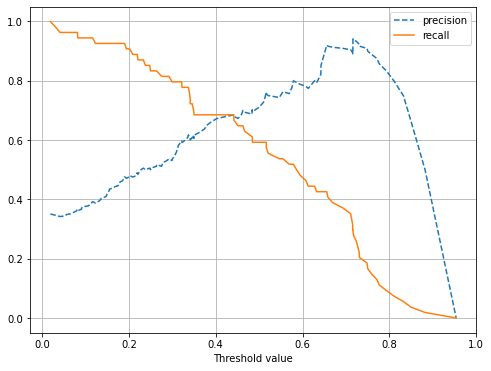

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:len(thresholds)],
         linestyle = '--', label = 'precision')
plt.plot(thresholds, recalls[:len(thresholds)], label = 'recall')
plt.xlabel('Threshold value')
plt.legend(); plt.grid()
plt.show()

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

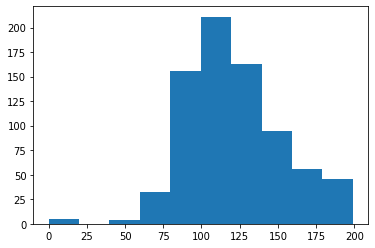

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [ ]:
(diabetes_data == 0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
diabetes_data[zero_features]=\
  diabetes_data[zero_features].replace(0,diabetes_data[zero_features].mean())

In [ ]:
(diabetes_data == 0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
y = diabetes_data['Outcome'].values
X = diabetes_data.iloc[:, :-1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test =\
  train_test_split(X_scaled, y, test_size=0.2,
                  random_state=156, stratify=y)

lr_clf= LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)